# Titanic Project

### Importing Libraries

In [1131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [1132]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description of columns:
    1)PassergerId: Numbering to each passenger starting from 1.
    2)Survived: Outcome of survival (0 = No; 1 = Yes)
    3)Pclass: Socio-economic class (1 = First class; 2 = Second class; 3 = Third class)
    4)Name: Name of passenger
    5)Sex: Sex of the passenger
    6)Age: Age of the passenger
    7)SibSp: Number of siblings and spouses of the passenger aboard
    8)Parch: Number of parents and children of the passenger aboard
    9)Ticket: Ticket number of the passenger
    10)Fare: Fare paid by the passenger
    11)Cabin: Cabin number of the passenger
    12)Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

We can think of dropping "PassengerId" column as its just a numbering and cannot contribute to predict survival.

In [1133]:
#checking shape of the dataset
df.shape

(891, 12)

Here we have 891 entries and 12 columns in our dataset including our target variable "Survived".

In [1134]:
#checking datatype for each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In our dataset we have few columns of object datatype and few are of integer and float datatype.

In [1135]:
#checking null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177 null values in Age column, 687 for Cabin column and 2 null values in Embarked column.

<AxesSubplot:>

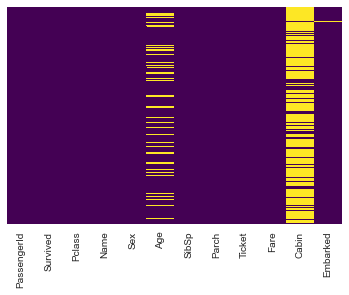

In [1136]:
#Plotting heatmap to show the null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

As we can see that "Age" and "Cabin" have missing values and we can adjust the age values by guessing the age as enough data is availabe to make predictions but in the cabin major data is missing so we will drop this.

In [1137]:
#checking the unique values for each column.
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Here we observe that we have 891 unique values for PassengerId and Name columns. Also, we have 681 unique values for Ticket column. We can drop these columns as survival cannot be decided on the basis of passenger's name or Id or Ticket.

In [1138]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers, 342 could survived and 549 died. Here we observe data imbalance for our target variable.

In [1139]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Out of 891 passengers, major portion of 491 were from Third class, 216 were from First class and 184 were from Second class.

In [1140]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Out of 891 passengers, 577 were male passengers and 314 were female.

In [1141]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Out of 891 passengers, 677 embarked from Southampton port, 168 embarked from Cherbourg and 77 from Queenstown. Data of two passengers embarkment is missing.

In [1142]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

We see that most of the passenger's parent or children were not abroad. Around 200 passengers had 1 or 2 parent or child aboard.

In [1143]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

We see that most of the passenger's Siblings or Spouse were nor aboard. Around 210 passengers had 1 spouse with them and around 30 had a child and spouse.

In [1144]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nakid, Mr. Sahid",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# EDA

### Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

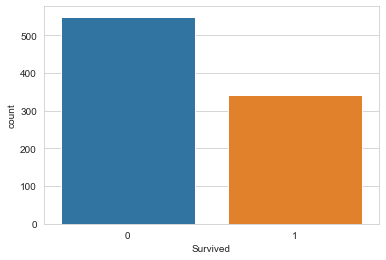

In [1145]:
sns.set_style("whitegrid")
sns.countplot(df["Survived"])

From this countplot we can say that our target variable "Survived" has data imbalance. We have more number of records for the passengers who did not survive.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

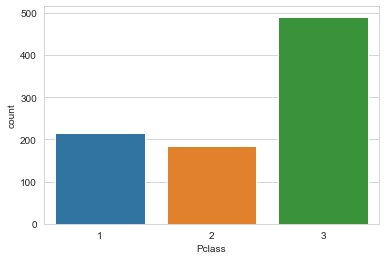

In [1146]:
sns.countplot(df["Pclass"])

Above countplot says that most of the passengers were from Third Class and count of First and Second Class passenegers was almost same.

<AxesSubplot:xlabel='Sex', ylabel='count'>

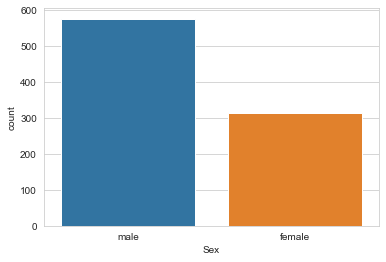

In [1147]:
sns.countplot(df["Sex"])

From the above countplot we can conclude that majority of the passenegers were Male. The count of Female passenegers was almost half of the Male passengers.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

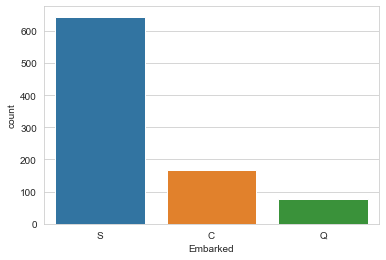

In [1148]:
sns.countplot(df["Embarked"])

From the above countplot we can say that majority of the passenegers embarked from Southampton port.

<AxesSubplot:xlabel='Parch', ylabel='count'>

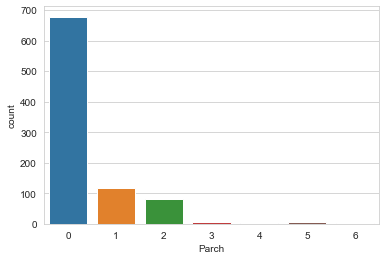

In [1149]:
sns.countplot(df["Parch"])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

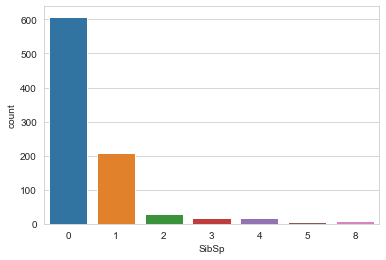

In [1150]:
sns.countplot(df["SibSp"])

<AxesSubplot:xlabel='Age'>

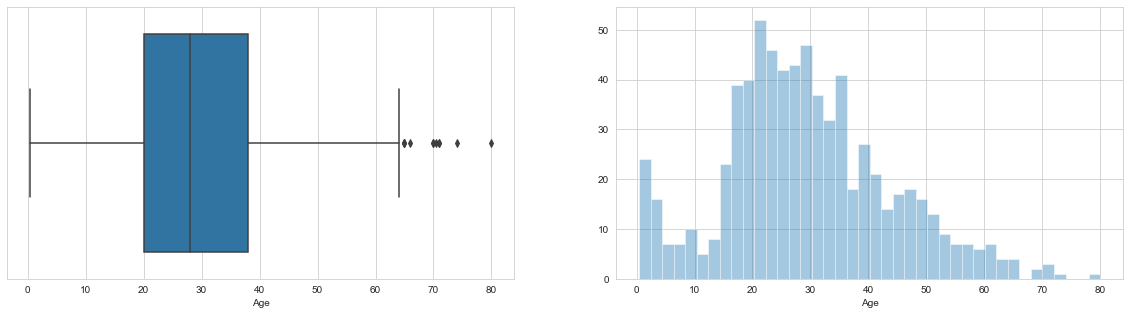

In [1151]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Age"])
plt.subplot(1,2,2)
sns.distplot(df["Age"].dropna(),kde=False,bins=40)

From the above plots we can conclude that "Age" feature has few extreme outliers and the distribution is approximately normal. There were few passengers between the age range 1 to 4. Maximum number of passengers were between the age range 17 to 36. There were very less number of old aged passengers.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

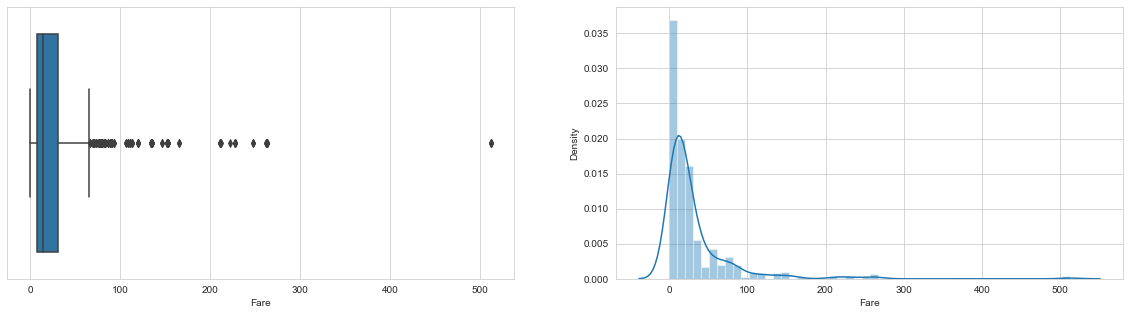

In [1152]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Fare"])
plt.subplot(1,2,2)
sns.distplot(df["Fare"])

From the above plots we can conclude that "Fare" feature has many extreme outliers and hence the distribution is right skewed.

### Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

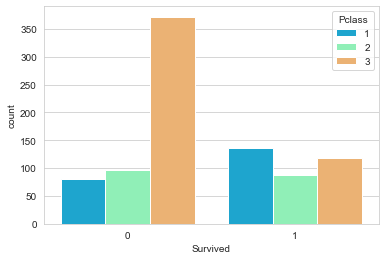

In [1153]:
sns.countplot(x="Survived",hue="Pclass",data=df,palette="rainbow")

<AxesSubplot:xlabel='Survived', ylabel='count'>

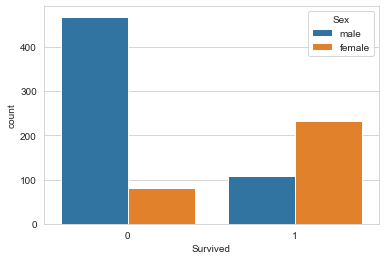

In [1154]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

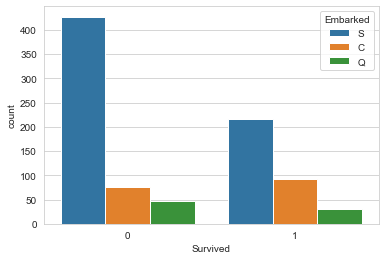

In [1155]:
sns.countplot(x="Survived",hue="Embarked",data=df)

### Treating Missing Values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

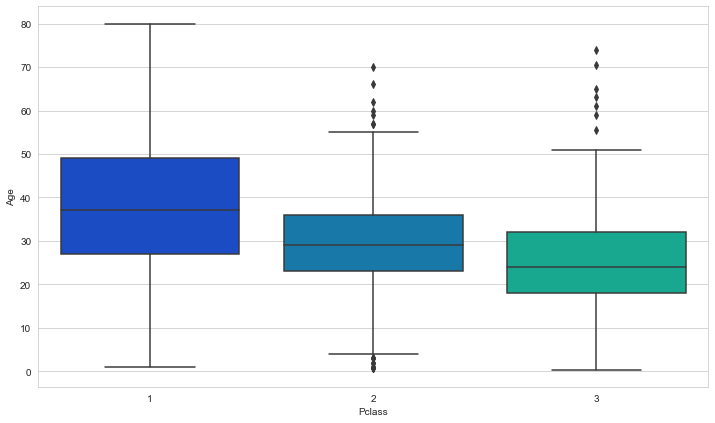

In [1156]:
#checking the age of passengers with respect to their Class
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df,palette="winter")

In [1157]:
#calculating average age of a passenger based on the Class
class_age=np.round(df.groupby('Pclass')['Age'].mean())

In [1158]:
class_age

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [1159]:
#defining a function to fill in NaN values for Age column
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return class_age[1]
        
        elif Pclass == 2:
            return class_age[2]
        
        else:
            return class_age[3]
        
    else:
        return Age

Now applying the function!

In [1160]:
df["Age"]=df[["Age","Pclass"]].apply(fill_age,axis=1)

Now let's check the heatmap again!

<AxesSubplot:>

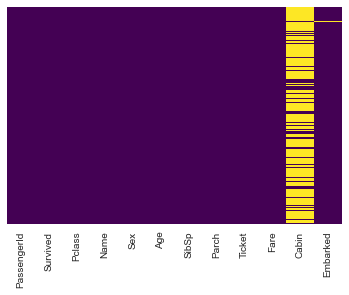

In [1161]:
#Plotting heatmap to show the null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [1162]:
#dropping Cabin column
df.drop("Cabin",axis=1,inplace=True)

In [1163]:
#dropping two row entries as Embarked column has 2 NaN values.
df.dropna(inplace=True)

In [1164]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Checking the heatmap again!

<AxesSubplot:>

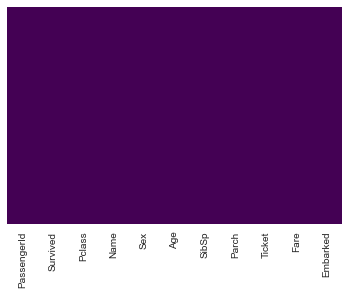

In [1165]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Now, we have no null values in our dataset.

### Converting Categorical Features

We'll need to convert categorical features to dummy variables, otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [1166]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Embarked=pd.get_dummies(df["Embarked"],drop_first=True)

These are our new columns created and we will have to append them.

### Dropping Unwanted Columns

In [1167]:
df.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [1168]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Appending Newly Created Columns

In [1169]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [1170]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Multivariate Analysis:

<AxesSubplot:>

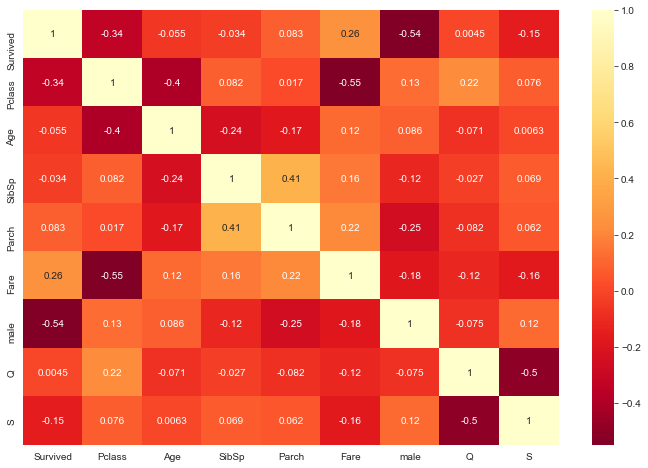

In [1171]:
#checking the correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="YlOrRd_r",annot=True)

### Removing Outliers:

In [1172]:
#removing outliers only for Age and Fare columns
from scipy.stats import zscore
z=np.abs(zscore(df[["Age",'Fare']]))
df_new=df[(z<3).all(axis=1)]

#### Plotting boxplots after removing outliers

<AxesSubplot:xlabel='Fare'>

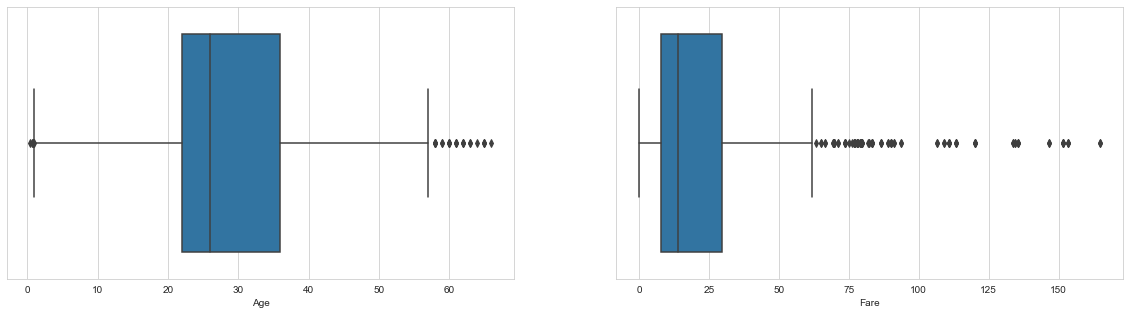

In [1173]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df_new["Age"])
plt.subplot(1,2,2)
sns.boxplot(df_new["Fare"])

In [1174]:
df_new.shape

(862, 9)

After removing outliers, we have 862 rows and 11 columns.

### Percentage of data loss:

In [1175]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

3.04 %


There is 3.04% of data loss with the outlier removal. To some extent outliers are removed.

### Creating X an Y Split

In [1176]:
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]

### Treating Imbalanced Data

As we have observed imbalanced data for our target variable, so lets first treat it to avoid biasness.

In [1177]:
from imblearn.over_sampling import SMOTE

In [1178]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [1179]:
y.value_counts()

1    537
0    537
Name: Survived, dtype: int64

Now, our target variable is balanced.

### Checking and Removing Skewness

In [1180]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.512581
SibSp       3.691058
Parch       2.745160
Fare        4.801440
male       -0.625625
Q           2.944406
S          -1.006192
dtype: float64

This is the skewness before removing outliers.

In [1181]:
x.skew()

Pclass   -0.496960
Age       0.212263
SibSp     4.023954
Parch     2.844198
Fare      2.145215
male     -0.179741
Q         3.098747
S        -0.762196
dtype: float64

We can ignore the skewness of categorical columns. Here we have skewness only for "Fare" column which is numerical.

In [1182]:
#Using Square Root transformation to remove skewness
x["Fare"]=np.sqrt(x["Fare"])

In [1183]:
x.skew()

Pclass   -0.496960
Age       0.212263
SibSp     4.023954
Parch     2.844198
Fare      1.175118
male     -0.179741
Q         3.098747
S        -0.762196
dtype: float64

The skewness of Fare column is reduced.

### Scaling

There is a difference between the range of values for independent columns. Hence, we are scaling.

In [1184]:
from sklearn.preprocessing import MinMaxScaler

In [1185]:
MM=MinMaxScaler()
x_scaled=MM.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.329064,0.125,0.0,0.209702,1.0,0.0,1.0
1,0.0,0.573041,0.125,0.0,0.657548,0.0,0.0,0.0
2,1.0,0.390058,0.000,0.0,0.219247,0.0,0.0,1.0
3,0.0,0.527295,0.125,0.0,0.567519,0.0,0.0,1.0
4,1.0,0.527295,0.000,0.0,0.220969,1.0,0.0,1.0


Now, all the features values are scaled and the model building will not be biased.

### Building the Model

In [1186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding the Best Random State

In [1187]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.8637770897832817  on Random State  10


Using the best Random State to create new train_test_split.

In [1188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [1189]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

### 1.KNeighborsClassifier

In [1190]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1191]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[143  24]
 [ 24 132]] 

Accuracy Score: 85.13931888544892
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       167
           1       0.85      0.85      0.85       156

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



### 2.AdaBoostClassifier

In [1192]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1193]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[144  23]
 [ 19 137]] 

Accuracy Score: 86.9969040247678
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.86      0.88      0.87       156

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



### 3.LogisticRegression

In [1194]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1195]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[145  22]
 [ 22 134]] 

Accuracy Score: 86.37770897832817
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       167
           1       0.86      0.86      0.86       156

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



### 4.DecisionTreeClassifier

In [1196]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1197]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[145  22]
 [ 27 129]] 

Accuracy Score: 84.82972136222911
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       167
           1       0.85      0.83      0.84       156

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



### 5.RandomForestClassifier

In [1198]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1199]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[147  20]
 [ 22 134]] 

Accuracy Score: 86.9969040247678
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       167
           1       0.87      0.86      0.86       156

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



### 6.SVC

In [1200]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1201]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[149  18]
 [ 30 126]] 

Accuracy Score: 85.13931888544892
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       167
           1       0.88      0.81      0.84       156

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here, we observe that RandomForestClassifier is giving the highest accuracy score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [1202]:
from sklearn.model_selection import cross_val_score

In [1203]:
print(cross_val_score(KNN,x,y,cv=5).mean()) #cross validation score for KNeighborsClassifier

0.83430558574223


In [1204]:
print(cross_val_score(AD,x,y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.8305933492718974


In [1205]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.8147793957835254


In [1206]:
print(cross_val_score(DTC,x,y,cv=5).mean()) #cross validation score for DecisionTreeClassifier

0.8240904151271463


In [1207]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.8371180178222126


In [1208]:
print(cross_val_score(SC,x,y,cv=5).mean()) #cross validation score for SVC

0.8241078026515976


From the above cross validation score, we can conclude that RandomForestClassifier is our best model with the least difference.

### Hyper Parameter Tuning

Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [1216]:
from sklearn.model_selection import GridSearchCV

In [1217]:
parameters={'criterion':['gini','entropy'],
           'n_estimators':[20,30,50,60,100,80,40],
           'max_depth':[2,3,4,5,6,7,8],
           'max_features':['auto','sqrt','log2']}

In [1218]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 30, 50, 60, 100, 80, 40]})

In [1219]:
GCVRFC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [1223]:
Final_modRFC=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=50)
Final_modRFC.fit(x_train,y_train)
pred=Final_modRFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100

In [1224]:
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[150  17]
 [ 25 131]] 

Accuracy Score: 86.9969040247678
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       167
           1       0.89      0.84      0.86       156

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 87%

### Plotting AUC_ROC curve

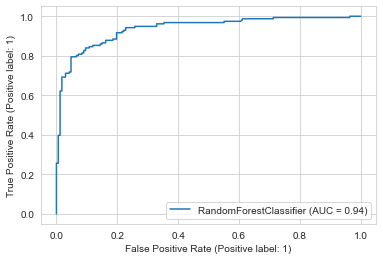

In [1225]:
metrics.plot_roc_curve(Final_modRFC, x_test, y_test)

The AUC score is 0.93

### Saving the Model

In [1226]:
import joblib
joblib.dump(Final_modRFC,"Titanic_Model.pkl")

['Titanic_Model.pkl']